<a href="https://colab.research.google.com/github/brenddonandrade/Redes-Complexas/blob/main/Comparation_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Necessary Installations and Imports

In [ ]:
import itertools
import networkx as nx
import scipy as sp
import numpy as np
from math import factorial
import time 
import matplotlib .pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Proposed Method

In [ ]:
def communicability(matrix, n):
  matrix_1 = matrix.copy()
  matrix_2 = matrix.copy()
  matrix_3 = matrix.copy()
  matrix_c = np.identity(len(matrix), float)
  matrix_c += matrix_1

  for k in range(2,n+1):
          
    # Raise the matrix by k
    matrix_1 = np.matmul(matrix_1, matrix_2)
    matrix_3 = matrix_1/factorial(k)


    # Sum the n matrices
    matrix_c += matrix_3
  
  return matrix_c

# Transform Dict from NetworkX to Numpy Array

In [ ]:
def create_matrix_adj(G):

  nodes = len(G.adj.items())
  matrix_adj = np.zeros((nodes, nodes), int)

  for node, nodedict in G.adj.items():
    for key in nodedict.keys():
      matrix_adj[node][key] = 1
      matrix_adj[key][node] = 1

  return matrix_adj

In [ ]:
def nx_to_np(dict_comunica):
    nodes = dict_comunica.__len__()
    matrix_c = np.zeros((nodes, nodes), float)

    for node_i, nodedict in dict_comunica.items():
        for node_j, value in nodedict.items():
            matrix_c[node_i][node_j] = value

    return matrix_c            

# Creating the Comparison

## Constants and Networks

In [ ]:
# Used constants and graphs

# Methods used
# Method 1: Spectral (nx.communicability(G))
# Method 2: Exponential (nx.communicability_exp(G))
# Method 3: Proposed method

# Number of nodes
N = 34


N_standard = 34 # Karate graph node numbers


# Equivalence
equivalence = 99.9


# Mean to calculate time
M = 1000


# Terms considered
K = 20


# Graph to be compared
A = nx.cycle_graph(N_standard) 
E = nx.star_graph(N_standard)  
Z = nx.karate_club_graph()
P = nx.krackhardt_kite_graph()

composition_of_graphs = [A, E, Z, P]

## Networks

<ipython-input-123-4e13f1cac621>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dtype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('graphs.png', dtype='png', dpi = 400)


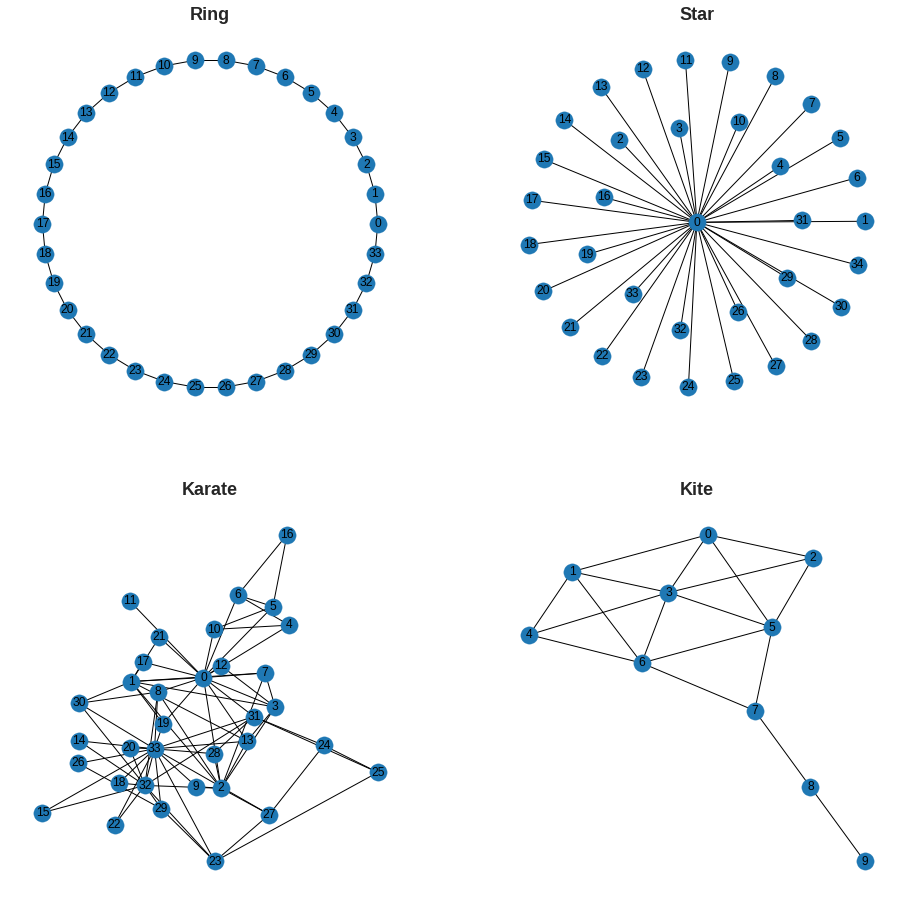

In [ ]:
# All networks used

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16,16))


# fig.suptitle('Networks used', fontsize=22, fontweight='bold')
nx.draw_kamada_kawai(A, ax = axs[0,0], with_labels=True)
axs[0,0].set_title('Ring', fontsize= 18, fontweight='bold')


nx.draw_kamada_kawai(E, ax = axs[0,1], with_labels=True)
axs[0,1].set_title('Star', fontsize= 18, fontweight='bold')


nx.draw_kamada_kawai(Z, ax = axs[1,0], with_labels=True)
axs[1,0].set_title('Karate', fontsize= 18, fontweight='bold')


nx.draw_kamada_kawai(P, ax = axs[1,1], with_labels=True)
axs[1,1].set_title('Kite', fontsize= 18, fontweight='bold');

# Save figure
fig.savefig('graphs.png', dtype='png', dpi = 400)

In [ ]:
# Calculate the mean (of communicability)
def mean_matrix(matrix):
    matrix_mean = (np.sum(matrix))/(len(matrix)**2)
    return matrix_mean

## The cost of the time (and comparations with other methods in %)

In [ ]:
# Calculate the cost
def calc_efficience(G, n):
    # Time
    time_list = []
    cost = []

    # Creating graph matrix adjance
    matrix_adj = create_matrix_adj(G)

    # mean of the communicative matrix
    com_1 = nx_to_np(nx.communicability(G))
    mean_1 = mean_matrix(com_1)

    # mean of the communicative matrix
    com_2 = nx_to_np(nx.communicability_exp(G))
    mean_2 = mean_matrix(com_2)

    # Spectral
    if(n == 1):
        time_start = time.time()
        for i in range(M):
            nx.communicability(G)
        time_end = time.time()
        time_list.append((time_end - time_start)/M)

    # Exponential
    if(n==1):
        time_start = time.time()
        for i in range(M):
            nx.communicability_exp(G)
        time_end = time.time()
        time_list.append((time_end - time_start)/M)

    # Proposed method
    time_start = time.time()
    for i in range(M):
        matrix_c = communicability(matrix_adj,n)    
    time_end = time.time()
    time_list.append((time_end - time_start)/M)


    # Error
    comparation = []
    # Comparation with the spectral
    mean = mean_matrix(matrix_c)
    comparation.append((mean/mean_1) * 100)

    # Comparation with the exponential
    comparation.append((mean/mean_2) * 100)

    cost = [time_list, comparation]
    
    return cost

In [ ]:
# matrix_adj = create_matrix_adj(A)
# com_1 = communicability(matrix_adj, 20)

# cost_item = calc_efficience(A,20)
# print(cost_item)


## Find the k_star

In [ ]:
# k_star is the k with property that communicability is 99% compared to other methods
def find_k_star(G):

    matrix_com_1 = nx_to_np(nx.communicability_exp(G))
    matrix_adj = create_matrix_adj(G)
    
    # Mean of communicability matrix
    mean_1 = mean_matrix(matrix_com_1)
    k_star = 0
    cont = 0
    list_comparation = []
    for i in range(1, K+1):
        matrix_com_2 = communicability(matrix_adj, i)
        mean_2 = mean_matrix(matrix_com_2)
        list_comparation.append((mean_2/mean_1)*100)
        if list_comparation[i-1] > 99.9 and cont == 0:
            k_star = i
            cont = cont +1
        if i == 20 and k_star == 0 :
            print('\n\n!!!NOT FOUND: k_star\n\n')

    return k_star        

## Data

In [ ]:
# Data
data_graphs = {}

data_graphs['Ring'] = A
data_graphs['Star'] = E
data_graphs['Karate'] = Z
data_graphs['Kite'] = P


def cost_for_terms(G):
    cost = []
    for i in range(1, K+1):
        cost.append(calc_efficience(G, i))
    return cost


for i, j in data_graphs.items():
    data_graphs[i] = [j, find_k_star(j), cost_for_terms(j)]


# print(data_graphs)

## Cost of Methods

In [ ]:

def print_cost(name, data):
    time_1 = []
    time_2 = []
    time_3 = []
    comparation_1 = []
    comparation_2 = []

    values = data[2]
    
    xt = []
    yt = []
    n = 0
    
    for value in values:
        if(n==0):
            time_1 = [ value[0][0] for i in range(len(values)) ]
            time_2 = [ value[0][1] for i in range(len(values)) ]
        
            time_3.append(value[0][2])
            comparation_1.append(value[1][0])
            comparation_2.append(value[1][1])
        else:
            time_3.append(value[0][0])
            comparation_1.append(value[1][0])
            comparation_2.append(value[1][1])
        n = n + 1

    xt = [ i+1 for i in range(len(comparation_1))]


    print('len(xt):', len(xt))
    print('len(time_1):', len(time_1))
    print('len(comparation):', len(comparation_1))
    print('time_1', time_1)
    print('comparation_1', comparation_1)

    # Find k_star
    for i in range(len(comparation_1)):
        if comparation_1[i] > equivalence:
            x = xt[i]
            y = comparation_1[i]
            break


    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(18, 9))
    # Graphics 1 - Cost of time
    fig.suptitle(name, fontsize=22, fontweight='bold')
    plt.style.use('seaborn')
    ax1.set_title('Computational Cost - Time[s] x Terms[k]', fontsize= 18, fontweight='bold')
    ax1.set_xlabel('k')
    ax1.set_xticks(xt)
    ax1.set_yscale('log')


    ax1.plot(xt, time_1, label='<Spectral Method>')
    ax1.plot(xt, time_2, label='<Exponential Method>')
    ax1.plot(xt, time_3, label='<Proposed Method>')
    ax1.set_ylabel('Time[s]')
    ax1.legend()


    # Grafico 2 - Comparacao
    ax2.set_title('Ralation between of the Methods X Terms[k]', fontsize= 18, fontweight='bold')
    ax2.set_xlabel('k')
    ax2.set_xticks(xt)
    ax2.set_ylabel('Percentage')

    ax2.plot(xt, comparation_1, label='Spectral Method')
    ax2.plot(xt, comparation_2, label='Exponential Method')
    ax2.annotate(f'99.9%\n k_star: {x}', xy = (x, y), xytext=(12, 60),
            arrowprops = {'facecolor': 'g'}, fontsize=22, color='k', fontweight='bold')
    ax2.legend();

    # Salvar a imagemq
    fig.savefig(f'comparation_{name}.png', format='png', dpi = 400)

## Graphfic cost of time and relation between methods

len(xt): 20
len(time_1): 20
len(comparation): 20
time_1 [0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359, 0.0862483193874359]
comparation_1 [40.6005849709838, 67.66764161830633, 85.71234604985467, 94.73469826562886, 98.34363915193853, 99.54661944737508, 99.89032810321412, 99.97625526717387, 99.99535019249825, 99.99916917756312, 99.99986353848401, 99.99997926530416, 99.99999706943032, 99.99999961287693, 99.99999995200314, 99.9999999943939, 99.99999999938107, 99.9999999999352, 99.99999999999353, 99.99999999999936]


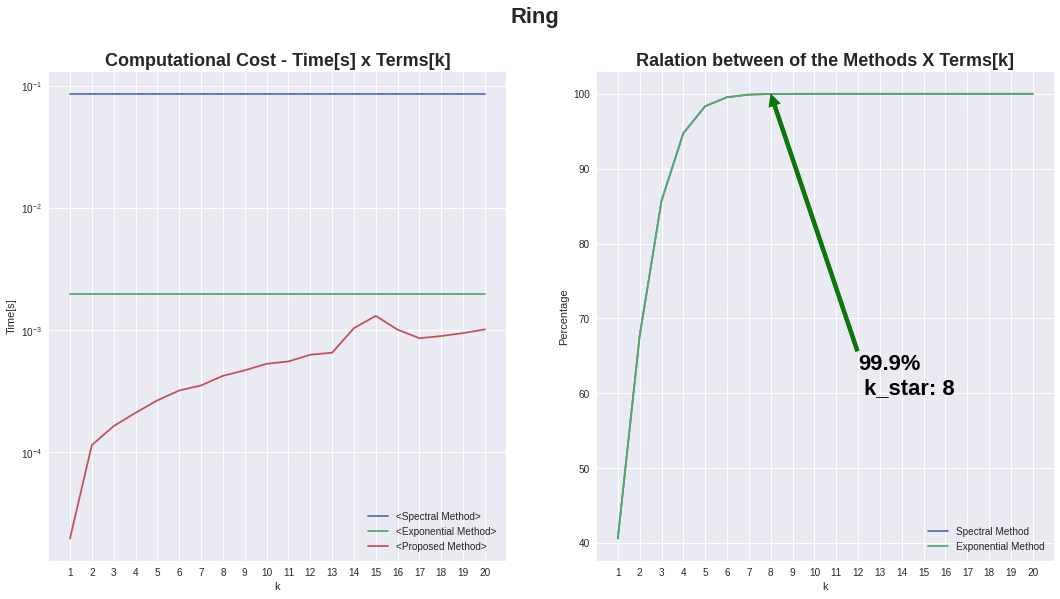

In [ ]:
print_cost('Ring', data_graphs['Ring'])
# print(data_graphs['Ring'][2])

## Histogram

In [ ]:
time_1 = []

def histogram_time(name, data):
    
    matrix_adj = create_matrix_adj(data[0])

    
    for i in range(M):
        time_start = time.time()
        communicability(matrix_adj, data[1])
        time_end = time.time()
        time_1.append(time_end - time_start)
    
    fig, ax = plt.subplots(sharey=True, tight_layout=True)
    
    fig.suptitle(name, fontsize=22, fontweight='bold')
    ax.set_title('Temporal cost', fontsize = 18, fontweight='bold')
    ax.set_xlabel('Time [s]')
    # ax.set_yscale('log')

    # We can set the number of bins with the *bins* keyword argument.
    ax.hist(time_1, bins=20);

    fig.savefig(f'histogram_{name}.png', dtype = 'png', dpi = 400)

<ipython-input-131-19c8c92dae90>:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dtype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig(f'histogram_{name}.png', dtype = 'png', dpi = 400)


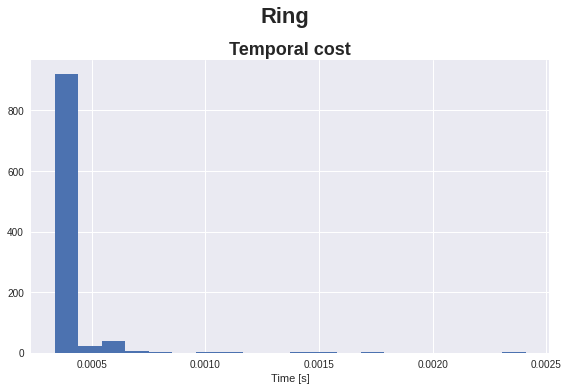

In [ ]:
# Ring
histogram_time('Ring', data_graphs['Ring'])

## Histogram k_star with temporal cost

In [ ]:
def bar_k_star(data):

    names = list(data.keys())    
    k_star_list = []
    matrix_adj = []
    time_mean_list = []

    for name in names:
        values = data[name]
        k_star = values[1]
        k_star_list.append(values[1])
        time_list = []


        for i in range(M):
            matrix_adj = create_matrix_adj(values[0])
            time_start = time.time()
            communicability(matrix_adj, k_star)
            time_end = time.time()
            time_list.append(time_end-time_start)

        time_mean = (sum(time_list)/(M))
        time_mean_list.append(time_mean)
    
    
    width_bar = 0.4
    X_axis = np.arange(len(names))

    fig, ax1 = plt.subplots(figsize = (8,8),sharey=True)

    fig.suptitle('K_star and Mean time', fontsize = 22, fontweight='bold')

    bar_1 = ax1.bar(X_axis - 0.2, k_star_list, color='b', width=width_bar, alpha=0.7)
    ax1.set_xlabel('Graphs')
    ax1.set_ylabel('k_star')
    ax1.legend()
    

    ax2 = ax1.twinx()
    bar_2 = ax2.bar(X_axis + 0.2, time_mean_list, color='r', width=width_bar, alpha=0.7)
    ax2.set_ylabel('Time [s]')
    plt.xticks(X_axis, names)
    
    ax1.legend([bar_1, bar_2], ['k_star', 'Mean time']);
    
    fig.savefig('k_star_mean_time.png', dtype = 'png', dpi=400)

<ipython-input-133-45ed6cca6cfe>:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dtype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('k_star_mean_time.png', dtype = 'png', dpi=400)


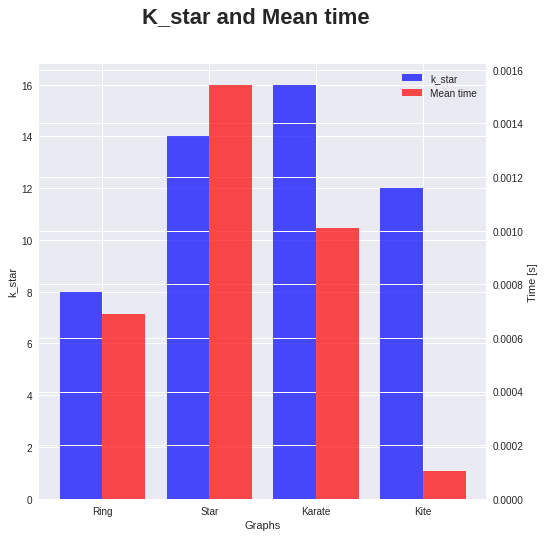

In [ ]:
bar_k_star(data_graphs)

## Terms x Time


In [ ]:
def cost_time_for_tems(data):
    names = list(data.keys())
    graphs = []
    time_list = []
    data_let = {}
    time_mean_list = []
    xt = [i for i  in range(1, K+1)]


    for value in data.values():
        graphs.append(value[0])
    

    i = 0
    for name in names:
        data_let[name] = graphs[i]
        i = i+1

    for name, graph in data_let.items():
        matrix_adj = []
        matrix_adj = create_matrix_adj(graph)
        time_mean_list = []
        for i in range(1, K+1):
            for j in range(M):
                time_start = time.time()
                communicability(matrix_adj, i)
                time_end = time.time()
                time_list.append(time_end-time_start)
            time_mean_list.append(sum(time_list)/(M))
        data_let[name] = [name, graph, time_mean_list]
    

    fig, ax = plt.subplots(figsize = (10,8),sharex = True)

    # Graphics 1 - Cost of time
    fig.suptitle('Computational Cost - Time[s] x Terms[k]', fontsize=22, fontweight='bold')
    ax.set_xlabel('k')
    ax.set_xticks(xt)
    # ax.set_yscale('log')
    ax.set_ylabel('Time [s]')


    ax.plot(xt, data_let[names[0]][2], label=  names[0])
    ax.plot(xt, data_let[names[1]][2], label=  names[1])
    ax.plot(xt, data_let[names[2]][2], label=  names[2])
    ax.plot(xt, data_let[names[3]][2], label=  names[3])
    # ax.plot(xt, time_2, label='<Exponential Method>')
    # ax.plot(xt, time_3, label='<Proposed Method>')
    # ax.set_ylabel('Time[s]')
    ax.legend();


    fig.savefig('time_for_terms.png', dtype = 'png', dpi=400)

    return data_let

In [ ]:
def cost_time_for_tems_log(data):
    names = list(data.keys())
    graphs = []
    time_list = []
    data_let = {}
    time_mean_list = []
    xt = [i for i  in range(1, K+1)]


    for value in data.values():
        graphs.append(value[0])
    

    i = 0
    for name in names:
        data_let[name] = graphs[i]
        i = i+1

    for name, graph in data_let.items():
        matrix_adj = []
        matrix_adj = create_matrix_adj(graph)
        time_mean_list = []
        for i in range(1, K+1):
            for j in range(M):
                time_start = time.time()
                communicability(matrix_adj, i)
                time_end = time.time()
                time_list.append(time_end-time_start)
            time_mean_list.append(sum(time_list)/(M))
        data_let[name] = [name, graph, time_mean_list]
    

    fig, ax = plt.subplots(figsize = (10,8),sharex = True)

    # Graphics 1 - Cost of time
    fig.suptitle('Computational Cost - Time[s] x Terms[k]', fontsize=22, fontweight='bold')
    ax.set_xlabel('k')
    ax.set_xticks(xt)
    ax.set_yscale('log')
    ax.set_ylabel('Time [s]')


    ax.plot(xt, data_let[names[0]][2], label=  names[0])
    ax.plot(xt, data_let[names[1]][2], label=  names[1])
    ax.plot(xt, data_let[names[2]][2], label=  names[2])
    ax.plot(xt, data_let[names[3]][2], label=  names[3])
    # ax.plot(xt, time_2, label='<Exponential Method>')
    # ax.plot(xt, time_3, label='<Proposed Method>')
    # ax.set_ylabel('Time[s]')
    ax.legend();
    
    fig.savefig('time_for_terms_log.png', dtype = 'png', dpi=400)
    return data_let

<ipython-input-135-40643d6ec3e1>:53: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dtype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('time_for_terms.png', dtype = 'png', dpi=400)


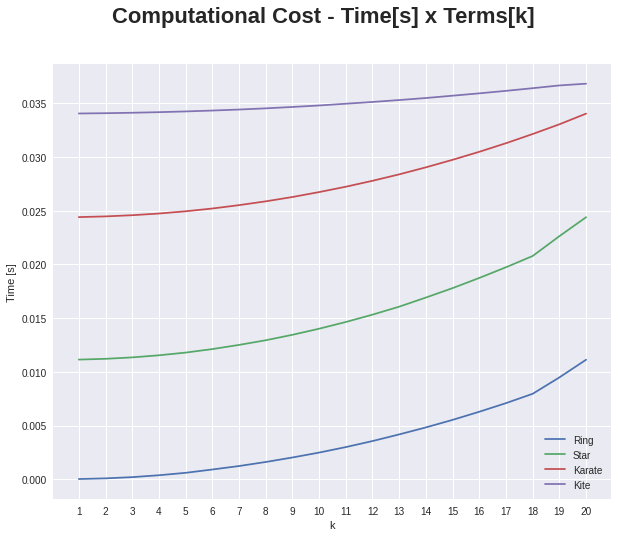

In [ ]:
data_let = cost_time_for_tems(data_graphs)

<ipython-input-136-8767c06960b3>:52: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dtype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('time_for_terms_log.png', dtype = 'png', dpi=400)


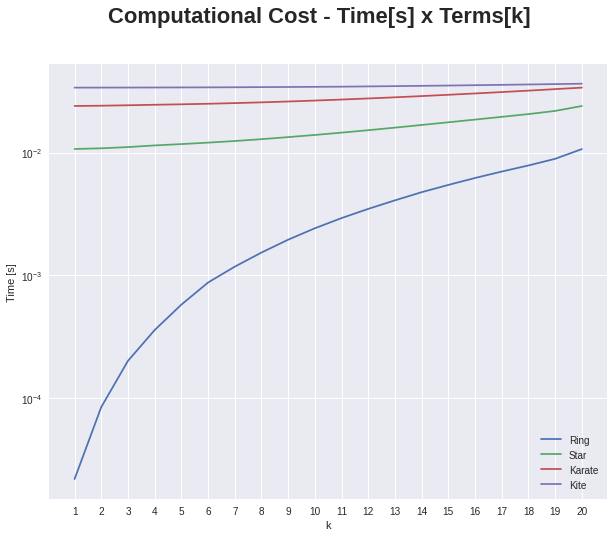

In [ ]:
data_let = cost_time_for_tems_log(data_graphs)


## Nodes x Cost time

In [ ]:
def temporal_mean_communicability(matrix_adj, k_star):
    time_list = []
    time_mean_list = []

    for i in range(M):    
        time_start = time.time()
        communicability(matrix_adj, k_star)
        time_end = time.time()
        time_list.append(time_end - time_start)
    
    time_mean_list.append(sum(time_list)/M)
    
    return time_mean_list

def cost_time_for_nodes():
    time_list_ring = []
    time_list_star = []
    data_let = {}
    xt = [ i for i in range(10, 200, 10)]
    
        
    for i in range(10,200, 10):
        A_let = nx.cycle_graph(i)
        E_let = nx.star_graph(i)  

        matrix_adj = create_matrix_adj(A_let)
        time_list_ring = time_list_ring + [temporal_mean_communicability(matrix_adj, 8)]
        


        matrix_adj = create_matrix_adj(E_let)
        time_list_star= time_list_star + [temporal_mean_communicability(matrix_adj, 14)]
    
    data_let['Ring'] = [xt, time_list_ring]
    data_let['Star'] = [xt, time_list_star]

    fig, ax = plt.subplots(figsize = (10,8),sharex = True)

    # Graphics 1 - Cost of time
    fig.suptitle('Computational Cost - Time[s] x Nodes[N]', fontsize=22, fontweight='bold')
    ax.set_xlabel('Nodes')
    ax.set_xticks(xt)
    # ax.set_yscale('log')
    ax.set_ylabel('Time [s]')


    ax.plot(xt, time_list_ring, label= 'Ring')
    ax.plot(xt, time_list_star, label= 'Star')
    # ax.plot(xt, time_2, label='<Exponential Method>')
    # ax.plot(xt, time_3, label='<Proposed Method>')
    ax.set_ylabel('Time[s]')
    ax.legend();
    
    fig.savefig('cost_time_for_node.png', dtype = 'png', dpi=400)
    return data_let

<ipython-input-139-d9105773844d>:54: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dtype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('cost_time_for_node.png', dtype = 'png', dpi=400)


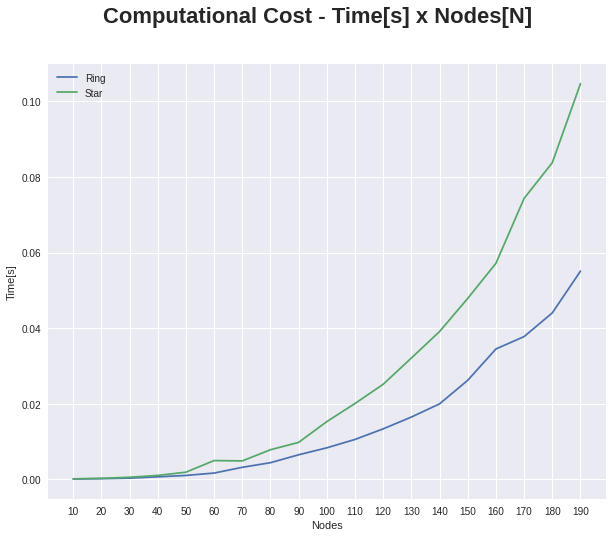

In [ ]:
cost_time_for_nodes();

## Accuracy of the k_star with the nodes

In [ ]:
def accuracy_k_star():
    comparation_ring = []
    comparation_star = []
    data_let = {}
    xt = [ i for i in range(10, 200, 10)]
    
        
    for i in range(10,200, 10):
        
        A_let = nx.cycle_graph(i)
        E_let = nx.star_graph(i)  

        # Ring
        matrix_ring_com_1 = nx_to_np(nx.communicability_exp(A_let))
        mean_ring_1 = mean_matrix(matrix_ring_com_1)
        
        matrix_ring_adj = create_matrix_adj(A_let)
        matrix_ring_com_2 = communicability(matrix_ring_adj, 8)

        mean_ring = mean_matrix(matrix_ring_com_2)

        comparation_ring.append((mean_ring/mean_ring_1)*100)


        # Star
        matrix_star_com_1 = nx_to_np(nx.communicability_exp(E_let))
        mean_star_1 = mean_matrix(matrix_star_com_1)
        
        matrix_star_adj = create_matrix_adj(E_let)
        matrix_star_com_2 = communicability(matrix_star_adj, 14)

        mean_star = mean_matrix(matrix_star_com_2)

        comparation_star.append((mean_star/mean_star_1)*100)

    fig, ax = plt.subplots(figsize = (10,8),sharex = True)


    # Graphics 1 - Cost of time
    fig.suptitle('Accuracy x Nodes[N]', fontsize=22, fontweight='bold')
    ax.set_xlabel('Nodes')
    ax.set_xticks(xt)
    # ax.set_yscale('log')

    ax.plot(xt, comparation_ring, label= 'Ring')
    ax.plot(xt, comparation_star, label= 'Star')
    ax.set_ylabel('Percentage')
    ax.legend();
    
    fig.savefig('time_for_terms_log.png', dtype = 'png', dpi=400)
    return data_let
        
        


    

<ipython-input-141-671996646285>:50: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dtype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('time_for_terms_log.png', dtype = 'png', dpi=400)


{}

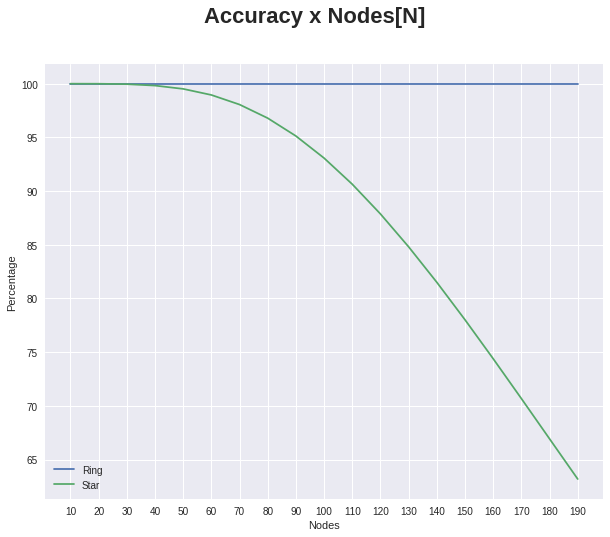

In [ ]:
accuracy_k_star()